In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#reading the raw data
import pandas as pd
df=pd.read_csv('/content/gdrive/MyDrive/PDS project/raw_data/raw_data.csv')
print(df.dtypes)
df.head()

RowNumber            int64
CustomerId         float64
Surname             object
CreditScore        float64
Geography           object
Gender              object
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited             float64
dtype: object


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602.0,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,2,15647311.0,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,3,15619304.0,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,4,15701354.0,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,NaN,0.0
4,5,15737888.0,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0


In [ ]:
print(df.shape)
print(df.isnull().sum())
df.describe()

(10000, 14)
RowNumber           0
CustomerId          7
Surname            15
CreditScore         7
Geography          52
Gender             26
Age                20
Tenure             11
Balance            24
NumOfProducts      22
HasCrCard          11
IsActiveMember      6
EstimatedSalary    68
Exited              8
dtype: int64


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,9.993000e+03,9993.000000,9980.000000,9989.000000,9976.000000,9978.000000,9989.000000,9994.000000,9932.000000,9992.000000
mean,5000.50000,1.569094e+07,650.523066,38.924148,5.010912,76401.556196,1.530066,0.705776,0.515209,100091.286949,0.203363
std,2886.89568,7.194941e+04,96.658607,10.491889,2.891957,62430.859153,0.581313,0.455716,0.499794,57528.078666,0.402520
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2500.75000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50910.677500,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97055.145000,1.000000,1.000000,1.000000,100238.110000,0.000000
75%,7500.25000,1.575325e+07,718.000000,44.000000,7.000000,127651.035000,2.000000,1.000000,1.000000,149401.645000,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [ ]:
ndf=df.copy()
ndf.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602.0,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,2,15647311.0,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,3,15619304.0,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,4,15701354.0,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,NaN,0.0
4,5,15737888.0,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0


In [ ]:
#handling NaN in continous feature
ndf.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
ndf.isnull().sum()


CreditScore         7
Geography          52
Gender             26
Age                20
Tenure             11
Balance            24
NumOfProducts      22
HasCrCard          11
IsActiveMember      6
EstimatedSalary    68
Exited              8
dtype: int64

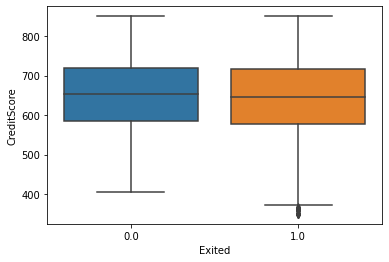

In [ ]:
import seaborn as sns
import matplotlib.pyplot as mlb

sns.boxplot(x='Exited',y='CreditScore',data=ndf)
mlb.show()

ndf['CreditScore']=ndf['CreditScore'].fillna(df['CreditScore'].median())



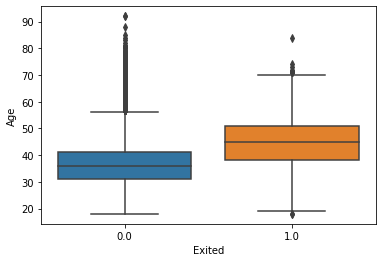

In [ ]:
sns.boxplot(x='Exited',y='Age',data=ndf)
mlb.show

ndf['Age']=ndf['Age'].fillna(df['Age'].median())


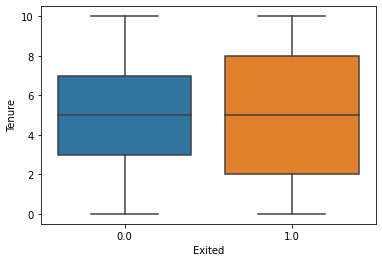

In [ ]:
sns.boxplot(x='Exited',y='Tenure',data=ndf)
mlb.show()
ndf['Tenure']=ndf['Tenure'].fillna(df['Tenure'].mean())

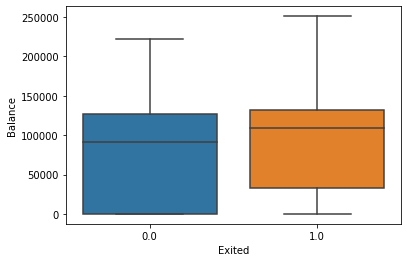

In [ ]:
sns.boxplot(x='Exited',y='Balance',data=ndf)
mlb.show()
ndf['Balance']=ndf['Balance'].fillna(df['Balance'].median())


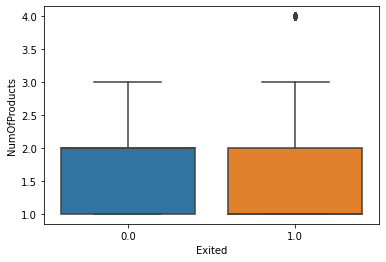

In [ ]:
sns.boxplot(x='Exited',y='NumOfProducts',data=ndf)
mlb.show()
ndf['NumOfProducts']=ndf['NumOfProducts'].fillna(df['NumOfProducts'].median())

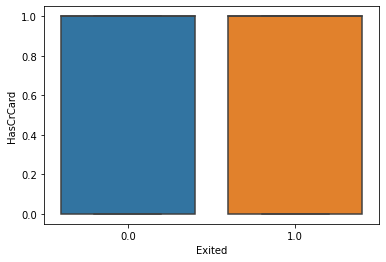

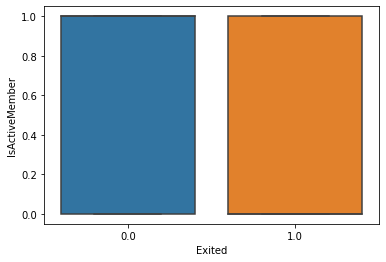

In [ ]:
sns.boxplot(x='Exited',y='HasCrCard',data=ndf)
mlb.show()
ndf['HasCrCard']=ndf['HasCrCard'].fillna(df['HasCrCard'].mode()[0])

sns.boxplot(x='Exited',y='IsActiveMember',data=ndf)
mlb.show()
ndf['IsActiveMember']=ndf['IsActiveMember'].fillna(df['IsActiveMember'].median())

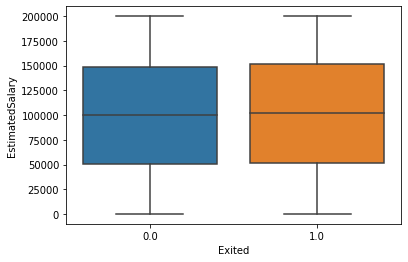

In [ ]:
sns.boxplot(x='Exited',y='EstimatedSalary',data=ndf)
mlb.show()
ndf['EstimatedSalary']=ndf['EstimatedSalary'].fillna(df['EstimatedSalary'].mean())

In [ ]:
ndf1=ndf.dropna(subset=['Exited'])

In [ ]:
#ndf1=ndf1.iloc[0,0]

In [ ]:
ndf1.isnull().sum()

CreditScore         0
Geography          52
Gender             26
Age                 0
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
Exited              0
dtype: int64

In [ ]:
ndf1.Gender.unique()

array(['Female', 'Male', nan], dtype=object)

In [ ]:

ndf1.dtypes

CreditScore        float64
Geography           object
Gender              object
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited             float64
dtype: object

In [ ]:
from numpy.core.memmap import dtype
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

ndf2=ndf1.copy()
ndf2.drop(columns='Gender',inplace=True)

ndf2_with_Geo=ndf2[ndf2['Geography'].notna()]
ndf2_with_Geo.Geography.replace(['France','Spain','Germany'],['0','1','2'],inplace=True)
ndf2_with_Geo['Geography']=pd.to_numeric(ndf2_with_Geo['Geography'])
ndf2_no_Geo=ndf2[ndf2['Geography'].isna()]
X=ndf2_with_Geo.drop('Geography', axis=1).values
y=ndf2_with_Geo['Geography'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.2,random_state=50)

forest=RandomForestClassifier(n_estimators=100,random_state=100)

# Fitting a model and making predictions
forest.fit(X_train,y_train)

predictions=forest.predict(X_test)
#print(pd.DataFrame(X_test))
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


              precision    recall  f1-score   support

           0       0.58      0.75      0.66       998
           1       0.25      0.07      0.11       493
           2       0.55      0.62      0.58       497

    accuracy                           0.55      1988
   macro avg       0.46      0.48      0.45      1988
weighted avg       0.49      0.55      0.50      1988

[[750  84 164]
 [371  36  86]
 [166  25 306]]


In [ ]:
import numpy as np
for i in range(len(ndf2)):
  if ndf2.iloc[i,1] not in ['Spain','France','Germany']:
      v=ndf2.iloc[i,:]
      w=v.filter(items=['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited'])
      b=np.array(w)
      b=b.reshape(1, -1)
      predictions = forest.predict(b)
      ndf2.iloc[i,1]=predictions

In [ ]:
ndf2.Geography.replace([0,1,2],['France','Spain','Germany'],inplace=True)
ndf1['Geography']=ndf2['Geography']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#finding the Gender NaN Values
ndf2.iloc[0:0]
ndf2=ndf1.copy()
ndf2.drop(columns='Geography',inplace=True)
ndf2_with_Gender=ndf2[ndf2['Gender'].notna()]
ndf2_with_Gender.Gender.replace(['Male','Female'],['0','1'],inplace=True)
ndf2_with_Gender['Gender']=pd.to_numeric(ndf2_with_Gender['Gender'])
ndf2_no_Gender=ndf2[ndf2['Gender'].isna()]
X=ndf2_with_Gender.drop('Gender', axis=1).values
y=ndf2_with_Gender['Gender'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=100)

forest = RandomForestClassifier(n_estimators=100, random_state=100)

# Fitting a model and making predictions
forest.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


RandomForestClassifier(random_state=100)

In [ ]:
import numpy as np
for i in range(len(ndf2)):
  if ndf2.iloc[i,1] not in ['Male','Female']:
      v=ndf2.iloc[i,:]
      w=v.filter(items=['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited'])
      b=np.array(w)
      b=b.reshape(1, -1)
      predictions = forest.predict(b)
      ndf2.iloc[i,1]=predictions

In [ ]:
ndf1.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
ndf2.Gender.replace([0,1],['Male','Female'],inplace=True)
ndf1['Gender']=ndf2['Gender']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
ndf1.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
ndf1.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
ndf3=ndf1.copy()
ndf3.isna().sum()
ndf3.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

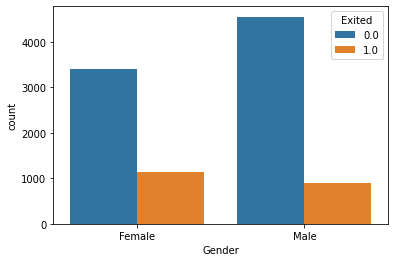

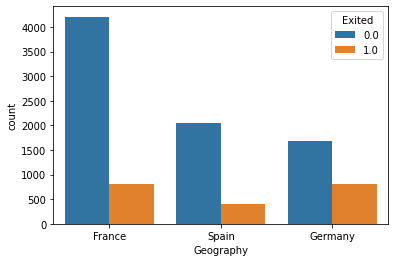

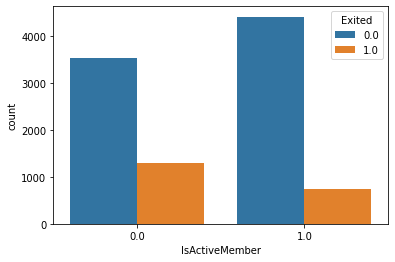

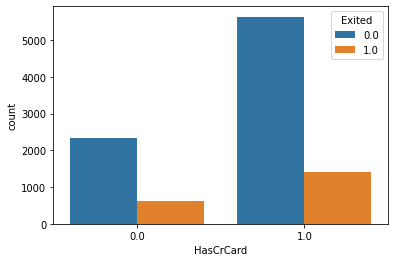

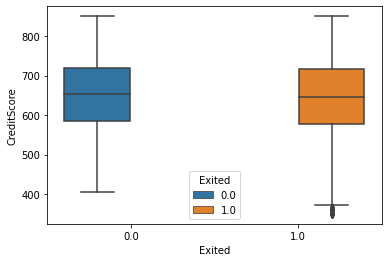

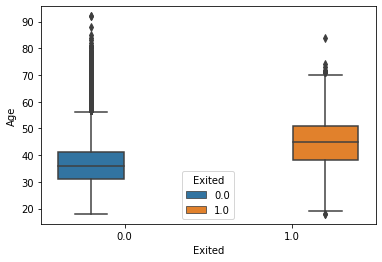

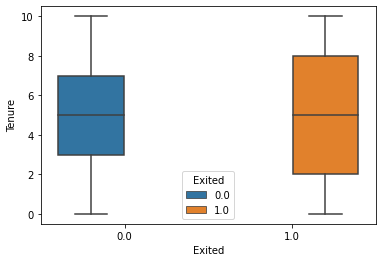

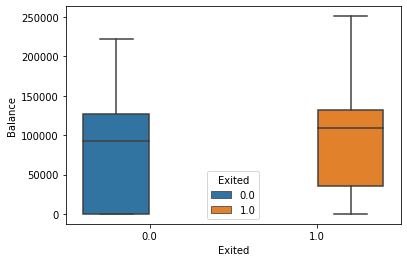

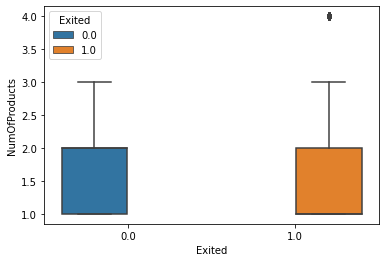

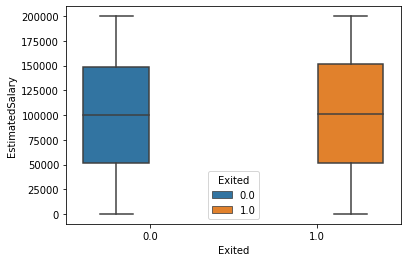

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Gender',hue='Exited',data=ndf3)
plt.show()

sns.countplot(x='Geography',hue='Exited',data=ndf3)
plt.show()

sns.countplot(x='IsActiveMember',hue='Exited',data=ndf3)
plt.show()

sns.countplot(x='HasCrCard',hue='Exited',data=ndf3)
plt.show()

sns.boxplot(y='CreditScore',x='Exited',hue='Exited',data=ndf3)
plt.show()

sns.boxplot(y='Age',x='Exited',hue='Exited',data=ndf3)
plt.show()

sns.boxplot(y='Tenure',x='Exited',hue='Exited',data=ndf3)
plt.show()

sns.boxplot(y='Balance',x='Exited',hue='Exited',data=ndf3)
plt.show()

sns.boxplot(y='NumOfProducts',x='Exited',hue='Exited',data=ndf3)
plt.show()

sns.boxplot(y='EstimatedSalary',x='Exited',hue='Exited',data=ndf3)
plt.show()

In [ ]:
#OneHotEncoding
ohed=pd.get_dummies(ndf3, columns = ['Geography', 'Gender'])
fdf=pd.DataFrame(ohed)
fdf.isna().sum()

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
Gender_Female        0
Gender_Male          0
dtype: int64

In [ ]:
fdf.to_csv('/content/gdrive/MyDrive/PDS project/cleaned_data/cleaned_data.csv')